In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv(r'D:\ChenMed\patients.csv')
df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,a026e2aa-baad-ec8f-6467-cc1d551b07f1,1986-02-14,NaN,999-54-2351,S99936372,X34529171X,Mrs.,Dorathy429,Rosita520,Bashirian201,...,Tampa,Florida,Hillsborough County,12057.0,33611,28.013581,-82.456366,110471.32,118799.60,11534
1,b9edfa61-85ea-6752-e4f9-82eed5795971,2018-02-17,NaN,999-88-3100,NaN,NaN,NaN,Jeanna557,Deborah357,Okuneva707,...,Miami,Florida,Miami-Dade County,12086.0,33139,25.790868,-80.210928,1350.00,24257.33,2291
2,aee01659-fd4a-816d-9a82-d6bd261e5e60,2011-01-28,NaN,999-78-5694,NaN,NaN,NaN,Rolando809,Sean831,White193,...,Yulee,Florida,Nassau County,12089.0,32097,30.628132,-81.613197,45379.43,11799.66,49750
3,94e9305c-e5b4-86f1-d919-ed68d46ede7d,2012-12-11,NaN,999-16-4825,NaN,NaN,NaN,Krystyna791,Joella167,Bergstrom287,...,Wellington,Florida,Palm Beach County,12099.0,33449,26.693884,-80.305558,46194.18,16989.84,147243
4,37f97377-749d-673a-adb6-08a3d40fd462,1980-11-02,NaN,999-13-2132,S99993697,X43073450X,Mr.,Charlie254,Norbert530,Jenkins714,...,Ives Estates,Florida,Miami-Dade County,NaN,0,25.932489,-80.218032,152153.83,11940.70,37492


In [4]:
df1 = pd.read_csv(r'D:\ChenMed\encounters.csv')
df1.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,a69261e5-27fc-966e-4069-13f1e2a0b869,2004-04-10T03:19:48Z,2004-04-10T04:10:56Z,a026e2aa-baad-ec8f-6467-cc1d551b07f1,a150a318-53fc-3731-ab58-8bf301fd7ce0,d05795c2-efa5-392d-b41b-36e46dcc5963,df166300-5a78-3502-a46a-832842197811,wellness,162673000,General examination of patient (procedure),163.63,1223.40,1073.4,NaN,NaN
1,49b03704-d808-e829-1e0d-a344b90cbbcc,2011-04-23T03:19:48Z,2011-04-23T04:15:45Z,a026e2aa-baad-ec8f-6467-cc1d551b07f1,a150a318-53fc-3731-ab58-8bf301fd7ce0,d05795c2-efa5-392d-b41b-36e46dcc5963,e03e23c9-4df1-3eb6-a62d-f70f02301496,wellness,162673000,General examination of patient (procedure),163.63,2147.18,0.0,NaN,NaN
2,ec196aa1-e402-961c-a292-9d424f9a0e1c,2011-12-27T15:00:16Z,2011-12-28T15:00:16Z,a026e2aa-baad-ec8f-6467-cc1d551b07f1,c78c7864-ccbe-31e2-a321-a2cc6a18df56,22b3b395-a43d-3031-a871-694787986b13,e03e23c9-4df1-3eb6-a62d-f70f02301496,inpatient,305408004,Admission to surgical department (procedure),108.86,19226.24,0.0,183996000.0,Sterilization requested (situation)
3,a87a159e-e2dd-e2c5-0772-f66c167304d2,2014-04-26T03:19:48Z,2014-04-26T03:57:43Z,a026e2aa-baad-ec8f-6467-cc1d551b07f1,a150a318-53fc-3731-ab58-8bf301fd7ce0,d05795c2-efa5-392d-b41b-36e46dcc5963,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,wellness,162673000,General examination of patient (procedure),163.63,1429.54,0.0,NaN,NaN
4,a8b62382-dc0c-fafa-e2e2-8bfb45c31c6f,2015-05-30T03:19:48Z,2015-05-30T04:18:23Z,a026e2aa-baad-ec8f-6467-cc1d551b07f1,8c19643a-4bb6-3d34-bd6b-c85c5621d232,30e5059f-25e0-3ec6-956f-3244ae1e3b82,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,urgentcare,702927004,Urgent care clinic (environment),106.81,858.66,0.0,NaN,NaN


In [5]:
df2 = pd.read_csv(r'D:\ChenMed\conditions.csv')
df2.head()

,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION
0,2004-04-10,NaN,a026e2aa-baad-ec8f-6467-cc1d551b07f1,a69261e5-27fc-966e-4069-13f1e2a0b869,http://snomed.info/sct,224299000,Received higher education (finding)
1,2011-04-23,2023-05-06,a026e2aa-baad-ec8f-6467-cc1d551b07f1,49b03704-d808-e829-1e0d-a344b90cbbcc,http://snomed.info/sct,73595000,Stress (finding)
2,2011-04-23,NaN,a026e2aa-baad-ec8f-6467-cc1d551b07f1,49b03704-d808-e829-1e0d-a344b90cbbcc,http://snomed.info/sct,10939881000119105,Unhealthy alcohol drinking behavior (finding)
3,2011-12-27,NaN,a026e2aa-baad-ec8f-6467-cc1d551b07f1,ec196aa1-e402-961c-a292-9d424f9a0e1c,http://snomed.info/sct,267020005,History of tubal ligation (situation)
4,2014-04-25,2017-04-29,a026e2aa-baad-ec8f-6467-cc1d551b07f1,a87a159e-e2dd-e2c5-0772-f66c167304d2,http://snomed.info/sct,160904001,Part-time employment (finding)


In [6]:
df3 = pd.read_csv(r'D:\ChenMed\ICD-10_New.csv')
df3.head(10)

,ICD10,ICD10_Description,Non_Emergent,Emergent__PC_Treatable,ED_Care_Needed__Preventable_Avoi,ED_Care_Needed__not_Preventable,Alcohol,Drug,Injury,Psych,Unclassified
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,A009,"Cholera, unspecified",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,A0100,"Typhoid fever, unspecified",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,A0101,Typhoid meningitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,A0102,Typhoid fever with heart involvement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,A0103,Typhoid pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,A0104,Typhoid arthritis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,A0105,Typhoid osteomyelitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,A0109,Typhoid fever with other complications,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
ed_cols = [
    "ICD10",
    "ICD10_Description",
    "Emergent__PC_Treatable",
    "ED_Care_Needed__Preventable_Avoi",
    "ED_Care_Needed__not_Preventable",
    "Non_Emergent"
]

# 创建副本
icd_ed = df3[ed_cols].copy()

# 只转换数值列（跳过描述列）
numeric_cols = ed_cols[2:]  # 跳过前两个
for c in numeric_cols:
    icd_ed[c] = pd.to_numeric(icd_ed[c], errors="coerce")

# 创建掩码：只保留任一分类值 > 0 的行
mask = (icd_ed[numeric_cols] > 0).any(axis=1)
icd_ed = icd_ed[mask].dropna(subset=numeric_cols)

icd_ed.head()

,ICD10,ICD10_Description,Emergent__PC_Treatable,ED_Care_Needed__Preventable_Avoi,ED_Care_Needed__not_Preventable,Non_Emergent
14,A020,Salmonella enteritis,1.0000,0.0,0.0000,0.0000
30,A039,"Shigellosis, unspecified",0.4571,0.0,0.1714,0.3714
42,A049,"Bacterial intestinal infection, unspecified",0.4571,0.0,0.1714,0.3714
50,A059,"Bacterial foodborne intoxication, unspecified",0.4571,0.0,0.1714,0.3714
77,A084,"Viral intestinal infection, unspecified",0.4571,0.0,0.1714,0.3714


In [8]:
map_df = pd.read_csv(r'D:\ChenMed\tls_Icd10cmHumanReadableMap_US1000124_20250301.tsv', sep='\t')
map_df.head()

,id,effectiveTime,active,moduleId,refsetId,referencedComponentId,referencedComponentName,mapGroup,mapPriority,mapRule,mapAdvice,mapTarget,mapTargetName,correlationId,mapCategoryId,mapCategoryName
0,4c4d2755-e65f-52dc-8353-ecf437495eb8,20250301,1,5991000124107,6011000124106,10000006,Radiating chest pain,1,1,TRUE,ALWAYS R07.9,R07.9,"Chest pain, unspecified",447561005,447637006,MAP SOURCE CONCEPT IS PROPERLY CLASSIFIED
1,f7e1ed02-3107-5a6c-9439-21e9879fb746,20250301,1,5991000124107,6011000124106,10001005,Bacterial sepsis,1,1,IFA 445518008 | Age at onset of clinical findi...,IF AGE AT ONSET OF CLINICAL FINDING BEFORE 29....,P36.9,"Bacterial sepsis of newborn, unspecified",447561005,447639009,MAP OF SOURCE CONCEPT IS CONTEXT DEPENDENT
2,907aa2b0-a832-5254-acdf-6f366e406d2b,20250301,1,5991000124107,6011000124106,10001005,Bacterial sepsis,1,2,OTHERWISE TRUE,ALWAYS A41.9 | CONSIDER ADDITIONAL CODE TO IDE...,A41.9,"Sepsis, unspecified organism",447561005,447637006,MAP SOURCE CONCEPT IS PROPERLY CLASSIFIED
3,0b918513-be22-5059-beb6-e8348dfc631f,20250301,1,5991000124107,6011000124106,10007009,Coffin-Siris syndrome,1,1,TRUE,ALWAYS Q04.8,Q04.8,Other specified congenital malformations of brain,447561005,447637006,MAP SOURCE CONCEPT IS PROPERLY CLASSIFIED
4,7f3f0a95-0441-57ba-a58f-03d2f2736c60,20250301,1,5991000124107,6011000124106,1001000119102,Pulmonary embolism with pulmonary infarction,1,1,TRUE,ALWAYS I26.99,I26.99,Other pulmonary embolism without acute cor pul...,447561005,447637006,MAP SOURCE CONCEPT IS PROPERLY CLASSIFIED


In [9]:
mapping_clean = (
    map_df[["referencedComponentId", "mapTarget"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

mapping_clean = mapping_clean.rename(columns={
    "referencedComponentId": "CODE",
    "mapTarget": "ICD10CM"
})
mapping_clean.head()

,CODE,ICD10CM
0,10000006,R07.9
1,10001005,P36.9
2,10001005,A41.9
3,10007009,Q04.8
4,1001000119102,I26.99


In [10]:
df2["CODE"]          = df2["CODE"].astype(str)
mapping_clean["CODE"] = mapping_clean["CODE"].astype(str)
icd_ed["ICD10"]      = icd_ed["ICD10"].astype(str)


df2_map = df2.merge(
    mapping_clean,
    on="CODE",
    how="left"
)

df2_map['ICD10CM_nodot'] = (
    df2_map['ICD10CM']
    .str.replace('.', '', regex=False)
    .str.upper()
)

icd_ed['ICD10_nodot'] = (
    icd_ed['ICD10']
    .str.replace('.', '', regex=False)
    .str.upper()
)

df2_ed = df2_map.merge(
    icd_ed,
    left_on='ICD10CM_nodot',
    right_on='ICD10_nodot',
    how='left'
)

print("After conbined：")
print(df2_ed[['CODE','ICD10CM','ICD10CM_nodot','ICD10','ICD10_nodot']].head(20))

After conbined：
                 CODE ICD10CM ICD10CM_nodot  ICD10 ICD10_nodot
0           224299000     NaN           NaN    NaN         NaN
1            73595000   Z73.3          Z733    NaN         NaN
2   10939881000119105  F10.10         F1010    NaN         NaN
3           267020005  Z98.51         Z9851    NaN         NaN
4           160904001     NaN           NaN    NaN         NaN
5           314529007  Z76.89         Z7689    NaN         NaN
6           361055000  F19.10         F1910    NaN         NaN
7            66383009  K05.10         K0510    NaN         NaN
8            10509002   J20.9          J209   J209        J209
9           444814009  J01.90         J0190  J0190       J0190
10          444814009   J32.9          J329   J329        J329
11          444814009  B97.89         B9789  B9789       B9789
12          444814009   B34.9          B349   B349        B349
13          444814009  J01.90         J0190  J0190       J0190
14          444814009   J32.9          

In [11]:
feature_cols = [
    "Emergent__PC_Treatable",
    "ED_Care_Needed__Preventable_Avoi",
    "ED_Care_Needed__not_Preventable",
    "Non_Emergent"
]
df2_ed[feature_cols] = df2_ed[feature_cols].fillna(0)
df2_ed.head()

,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,ICD10CM,ICD10CM_nodot,ICD10,ICD10_Description,Emergent__PC_Treatable,ED_Care_Needed__Preventable_Avoi,ED_Care_Needed__not_Preventable,Non_Emergent,ICD10_nodot
0,2004-04-10,NaN,a026e2aa-baad-ec8f-6467-cc1d551b07f1,a69261e5-27fc-966e-4069-13f1e2a0b869,http://snomed.info/sct,224299000,Received higher education (finding),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1,2011-04-23,2023-05-06,a026e2aa-baad-ec8f-6467-cc1d551b07f1,49b03704-d808-e829-1e0d-a344b90cbbcc,http://snomed.info/sct,73595000,Stress (finding),Z73.3,Z733,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2,2011-04-23,NaN,a026e2aa-baad-ec8f-6467-cc1d551b07f1,49b03704-d808-e829-1e0d-a344b90cbbcc,http://snomed.info/sct,10939881000119105,Unhealthy alcohol drinking behavior (finding),F10.10,F1010,NaN,NaN,0.0,0.0,0.0,0.0,NaN
3,2011-12-27,NaN,a026e2aa-baad-ec8f-6467-cc1d551b07f1,ec196aa1-e402-961c-a292-9d424f9a0e1c,http://snomed.info/sct,267020005,History of tubal ligation (situation),Z98.51,Z9851,NaN,NaN,0.0,0.0,0.0,0.0,NaN
4,2014-04-25,2017-04-29,a026e2aa-baad-ec8f-6467-cc1d551b07f1,a87a159e-e2dd-e2c5-0772-f66c167304d2,http://snomed.info/sct,160904001,Part-time employment (finding),NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [12]:
df2_ed["ED_label"] = (df2_ed["Non_Emergent"] <= 0.5).astype(int)
print(df2_ed[[
    "ICD10CM",
    "Emergent__PC_Treatable",
    "ED_Care_Needed__Preventable_Avoi",
    "ED_Care_Needed__not_Preventable",
    "Non_Emergent",
    "ED_label"
]].head(50))

    ICD10CM  Emergent__PC_Treatable  ED_Care_Needed__Preventable_Avoi  \
0       NaN                  0.0000                            0.0000   
1     Z73.3                  0.0000                            0.0000   
2    F10.10                  0.0000                            0.0000   
3    Z98.51                  0.0000                            0.0000   
4       NaN                  0.0000                            0.0000   
5    Z76.89                  0.0000                            0.0000   
6    F19.10                  0.0000                            0.0000   
7    K05.10                  0.0000                            0.0000   
8     J20.9                  0.8226                            0.1774   
9    J01.90                  0.0000                            0.0000   
10    J32.9                  0.1500                            0.0000   
11   B97.89                  0.4357                            0.0000   
12    B34.9                  0.4370                

In [13]:
# 选择需要保留的列
columns_to_keep = [
    'Id',
    'BIRTHDATE',   
    'GENDER',          
    'CITY',                      
    'HEALTHCARE_EXPENSES',
    'HEALTHCARE_COVERAGE',  
    'INCOME'      
]
df = df[columns_to_keep]

# 查看前几行
print(df.head())

                                     Id   BIRTHDATE GENDER          CITY  \
0  a026e2aa-baad-ec8f-6467-cc1d551b07f1  1986-02-14      F         Tampa   
1  b9edfa61-85ea-6752-e4f9-82eed5795971  2018-02-17      F         Miami   
2  aee01659-fd4a-816d-9a82-d6bd261e5e60  2011-01-28      M         Yulee   
3  94e9305c-e5b4-86f1-d919-ed68d46ede7d  2012-12-11      F    Wellington   
4  37f97377-749d-673a-adb6-08a3d40fd462  1980-11-02      M  Ives Estates   

   HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE  INCOME  
0            110471.32            118799.60   11534  
1              1350.00             24257.33    2291  
2             45379.43             11799.66   49750  
3             46194.18             16989.84  147243  
4            152153.83             11940.70   37492  


In [14]:
from datetime import datetime

df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'], errors='coerce')

today = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
df['AGE'] = (today - df['BIRTHDATE']).dt.days // 365

df.drop(columns=['BIRTHDATE'], inplace=True)
print(df.head())

                                     Id GENDER          CITY  \
0  a026e2aa-baad-ec8f-6467-cc1d551b07f1      F         Tampa   
1  b9edfa61-85ea-6752-e4f9-82eed5795971      F         Miami   
2  aee01659-fd4a-816d-9a82-d6bd261e5e60      M         Yulee   
3  94e9305c-e5b4-86f1-d919-ed68d46ede7d      F    Wellington   
4  37f97377-749d-673a-adb6-08a3d40fd462      M  Ives Estates   

   HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE  INCOME  AGE  
0            110471.32            118799.60   11534   39  
1              1350.00             24257.33    2291    7  
2             45379.43             11799.66   49750   14  
3             46194.18             16989.84  147243   12  
4            152153.83             11940.70   37492   44  


In [15]:
# 选择需要保留的列
columns_to_keep = [
    'Id',                # Encounter ID
    'START',             
    'PATIENT',          
    'PAYER',           
    'ENCOUNTERCLASS',  
    'DESCRIPTION',
    'BASE_ENCOUNTER_COST', 
    'TOTAL_CLAIM_COST', 
    'PAYER_COVERAGE'
]

# 只保留有用列
df1 = df1[columns_to_keep]

# 查看前几行确认
print(df1.head())

                                     Id                 START  \
0  a69261e5-27fc-966e-4069-13f1e2a0b869  2004-04-10T03:19:48Z   
1  49b03704-d808-e829-1e0d-a344b90cbbcc  2011-04-23T03:19:48Z   
2  ec196aa1-e402-961c-a292-9d424f9a0e1c  2011-12-27T15:00:16Z   
3  a87a159e-e2dd-e2c5-0772-f66c167304d2  2014-04-26T03:19:48Z   
4  a8b62382-dc0c-fafa-e2e2-8bfb45c31c6f  2015-05-30T03:19:48Z   

                                PATIENT                                 PAYER  \
0  a026e2aa-baad-ec8f-6467-cc1d551b07f1  df166300-5a78-3502-a46a-832842197811   
1  a026e2aa-baad-ec8f-6467-cc1d551b07f1  e03e23c9-4df1-3eb6-a62d-f70f02301496   
2  a026e2aa-baad-ec8f-6467-cc1d551b07f1  e03e23c9-4df1-3eb6-a62d-f70f02301496   
3  a026e2aa-baad-ec8f-6467-cc1d551b07f1  8fa6c185-e44e-3e34-8bd8-39be8694f4ce   
4  a026e2aa-baad-ec8f-6467-cc1d551b07f1  8fa6c185-e44e-3e34-8bd8-39be8694f4ce   

  ENCOUNTERCLASS                                   DESCRIPTION  \
0       wellness    General examination of patient (proc

In [16]:
df.rename(columns={'Id': 'PATIENT'}, inplace=True)
df1 = df1.merge(df, how='left', on='PATIENT')

print(df1.head(50))

print(df1.columns.tolist())

                                      Id                 START  \
0   a69261e5-27fc-966e-4069-13f1e2a0b869  2004-04-10T03:19:48Z   
1   49b03704-d808-e829-1e0d-a344b90cbbcc  2011-04-23T03:19:48Z   
2   ec196aa1-e402-961c-a292-9d424f9a0e1c  2011-12-27T15:00:16Z   
3   a87a159e-e2dd-e2c5-0772-f66c167304d2  2014-04-26T03:19:48Z   
4   a8b62382-dc0c-fafa-e2e2-8bfb45c31c6f  2015-05-30T03:19:48Z   
5   830af06f-fe7c-e5bc-d98b-8d70013dbb0e  2015-06-06T03:19:48Z   
6   95cf6805-c4d5-bb1f-2395-98c4c8e8f4c7  2015-06-13T03:19:48Z   
7   8e8897dd-29bc-d2f0-a4bf-7c22e21d58d3  2015-12-31T22:19:48Z   
8   4e714ca1-1c27-386f-3ffa-3ab8c74c5fb8  2016-02-20T03:19:48Z   
9   8867b9c9-0751-496a-7655-4d28ff533ec4  2016-08-12T02:19:48Z   
10  6b09d178-187e-8c4d-850a-9722a34b11a2  2017-04-29T03:19:48Z   
11  60886e91-1293-b2b8-c976-59a0f8b5deb8  2020-05-02T03:19:48Z   
12  5809d750-3ac3-79af-3f0c-895453d81aa2  2021-02-20T03:19:48Z   
13  40f479d1-899c-1012-bbd7-8235fd967f87  2021-04-17T03:19:48Z   
14  805f2b

In [17]:
# 1. 只保留ENCOUNTER和ED_label
encounter_ed_label = df2_ed[['ENCOUNTER', 'ICD10CM','ED_label']].drop_duplicates()

# 2. Encounter表是df1（或df1_merge），它的Encounter ID列是'Id'
# 左连接，保留所有Encounter
df1_merge = df1.merge(encounter_ed_label, how='left', left_on='Id', right_on='ENCOUNTER')

# 3. 填补缺失值（没有急诊记录的，默认ED_label=0）
df1_merge['ED_label'] = df1_merge['ED_label'].fillna(0).astype(int)

# 4. （可选）删除重复ENCOUNTER列
df1_merge = df1_merge.drop(columns=['ENCOUNTER'])

# 5. 检查一下
print(df1_merge.head(20))

                                      Id                 START  \
0   a69261e5-27fc-966e-4069-13f1e2a0b869  2004-04-10T03:19:48Z   
1   49b03704-d808-e829-1e0d-a344b90cbbcc  2011-04-23T03:19:48Z   
2   49b03704-d808-e829-1e0d-a344b90cbbcc  2011-04-23T03:19:48Z   
3   ec196aa1-e402-961c-a292-9d424f9a0e1c  2011-12-27T15:00:16Z   
4   a87a159e-e2dd-e2c5-0772-f66c167304d2  2014-04-26T03:19:48Z   
5   a8b62382-dc0c-fafa-e2e2-8bfb45c31c6f  2015-05-30T03:19:48Z   
6   a8b62382-dc0c-fafa-e2e2-8bfb45c31c6f  2015-05-30T03:19:48Z   
7   a8b62382-dc0c-fafa-e2e2-8bfb45c31c6f  2015-05-30T03:19:48Z   
8   830af06f-fe7c-e5bc-d98b-8d70013dbb0e  2015-06-06T03:19:48Z   
9   95cf6805-c4d5-bb1f-2395-98c4c8e8f4c7  2015-06-13T03:19:48Z   
10  8e8897dd-29bc-d2f0-a4bf-7c22e21d58d3  2015-12-31T22:19:48Z   
11  8e8897dd-29bc-d2f0-a4bf-7c22e21d58d3  2015-12-31T22:19:48Z   
12  8e8897dd-29bc-d2f0-a4bf-7c22e21d58d3  2015-12-31T22:19:48Z   
13  8e8897dd-29bc-d2f0-a4bf-7c22e21d58d3  2015-12-31T22:19:48Z   
14  4e714c

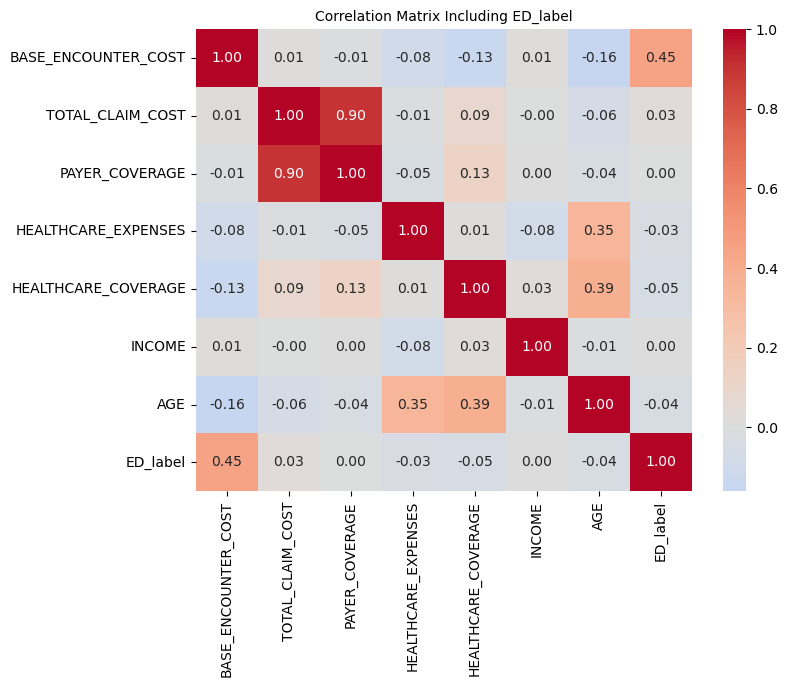

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 统一列名去掉前后空格
df1_merge.columns = df1_merge.columns.str.strip()

# 现在重新选数值型列
numeric_cols = df1_merge.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 强制加ED_label进去（保险）
if 'ED_label' not in numeric_cols:
    numeric_cols.append('ED_label')

# 画Correlation Matrix
corr_matrix = df1_merge[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation Matrix Including ED_label", fontsize=10)
plt.show()

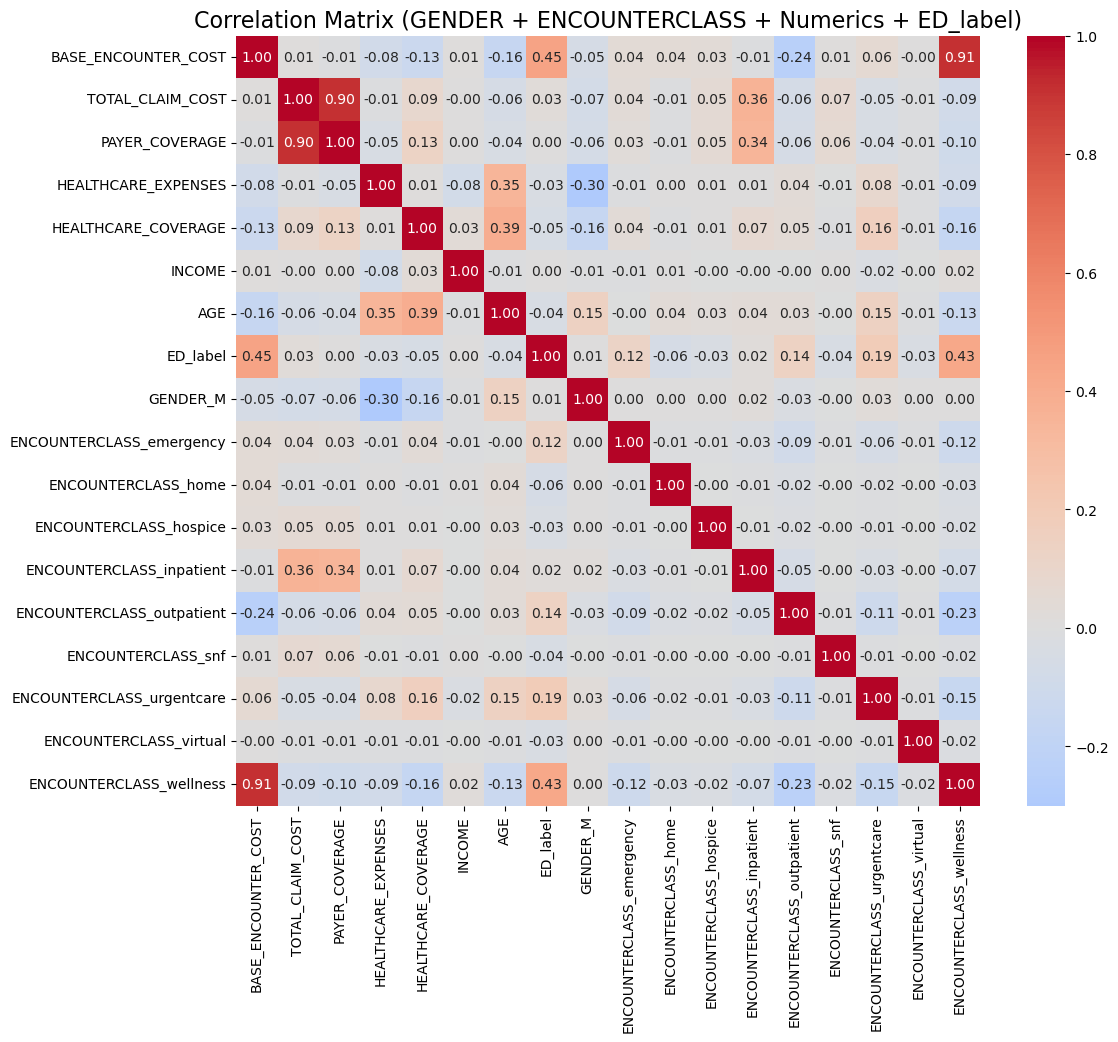

In [19]:
# 1. 先统一列名
df1_merge.columns = df1_merge.columns.str.strip()

# 2. 只Dummy这两列
simple_dummy_cols = ['GENDER', 'ENCOUNTERCLASS']
df_dummies_simple = pd.get_dummies(df1_merge[simple_dummy_cols], drop_first=True)

# 3. 拼接上数值列
numeric_cols = ['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 
                'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'INCOME', 'AGE']

df_model_simple = pd.concat([df1_merge[numeric_cols + ['ED_label']], df_dummies_simple], axis=1)

# 4. 画相关性矩阵
plt.figure(figsize=(12, 10))
corr_matrix_simple = df_model_simple.corr()

sns.heatmap(corr_matrix_simple, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation Matrix (GENDER + ENCOUNTERCLASS + Numerics + ED_label)", fontsize=16)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 4. 合并特征
X_full = pd.concat([df1_merge[numeric_cols], df_dummies_simple], axis=1)
y_full = df1_merge['ED_label']

# 5. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42, stratify=y_full
)

# 6. 标准化数值特征（Dummy列不用标准化）
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.86      0.83    202390
           1       0.87      0.80      0.83    222185

    accuracy                           0.83    424575
   macro avg       0.83      0.83      0.83    424575
weighted avg       0.83      0.83      0.83    424575



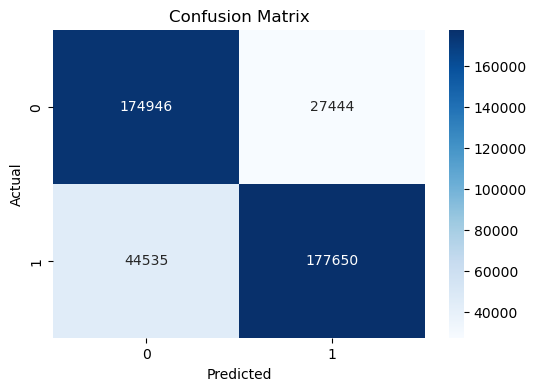

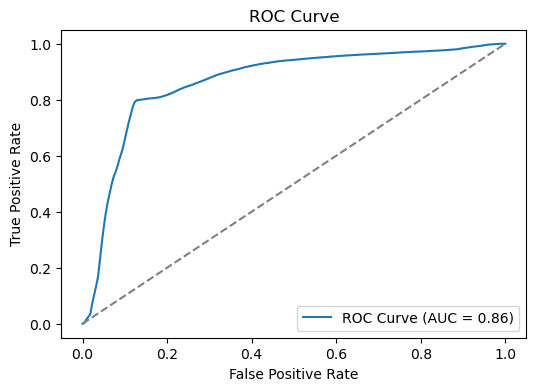

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# 1. 建立Logistic Regression模型
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 2. 预测
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # 概率分数，用来画ROC

# 3. 打印指标
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 4. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. ROC曲线和AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.91      0.85    202390
           1       0.91      0.80      0.85    222185

    accuracy                           0.85    424575
   macro avg       0.86      0.85      0.85    424575
weighted avg       0.86      0.85      0.85    424575



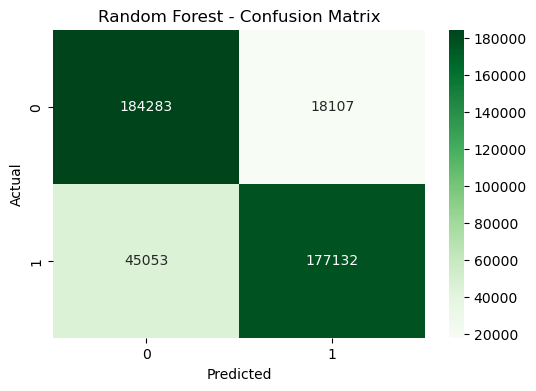

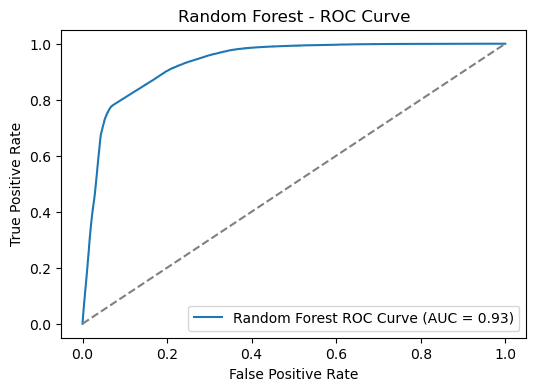

In [22]:
from sklearn.ensemble import RandomForestClassifier

# 1. 建立Random Forest模型
rf_model = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)

# 2. 预测
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# 3. 打印指标
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))

# 4. 混淆矩阵
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. ROC曲线和AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_proba)
auc_score_rf = roc_auc_score(y_test, y_pred_rf_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC Curve (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()

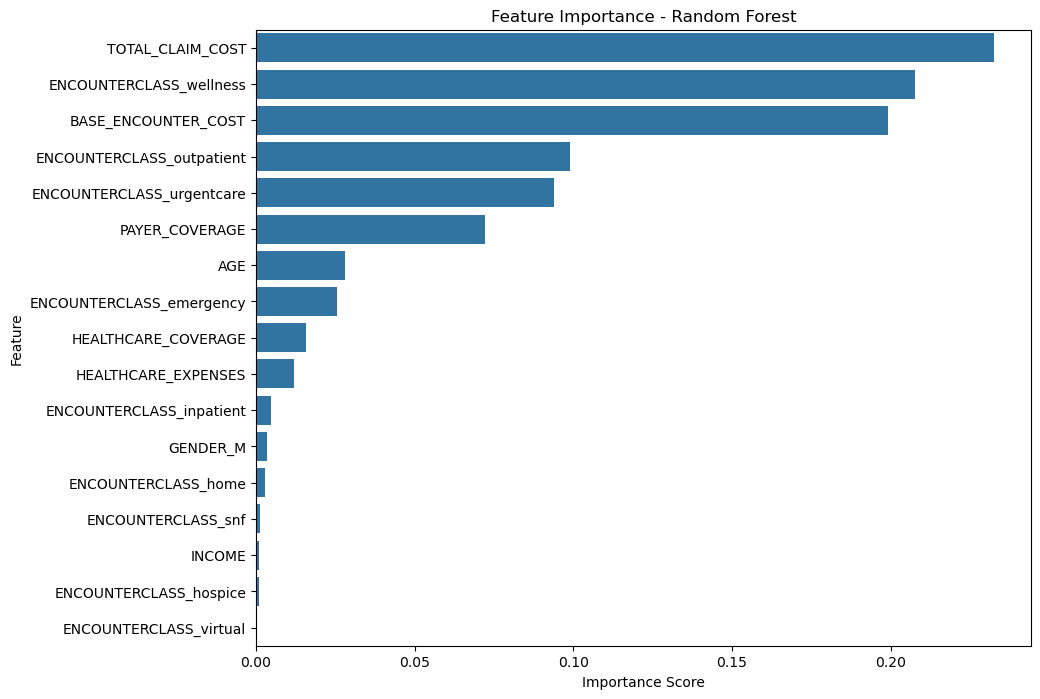

In [23]:
# 1. 取出特征重要性
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# 2. 排序
feature_importance = feature_importance.sort_values(ascending=False)

# 3. 画柱状图
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

C:\Users\w1305\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:45:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.86      0.86    202390
           1       0.88      0.88      0.88    222185

    accuracy                           0.87    424575
   macro avg       0.87      0.87      0.87    424575
weighted avg       0.87      0.87      0.87    424575



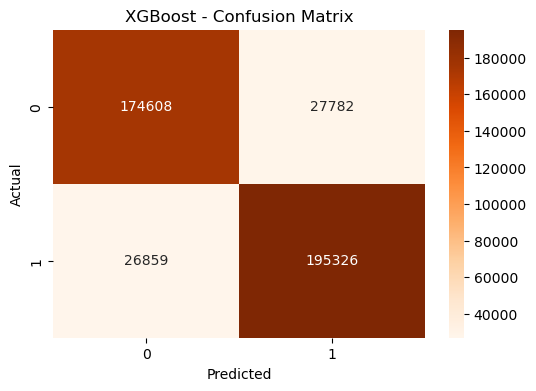

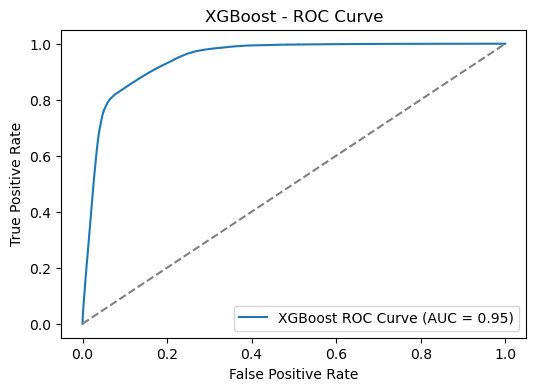

In [24]:
from xgboost import XGBClassifier

# 1. 建立XGBoost模型
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 2. 预测
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# 3. 打印指标
print("=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred_xgb))

# 4. 混淆矩阵
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. ROC曲线和AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb_proba)
auc_score_xgb = roc_auc_score(y_test, y_pred_xgb_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC Curve (AUC = {auc_score_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend()
plt.show()

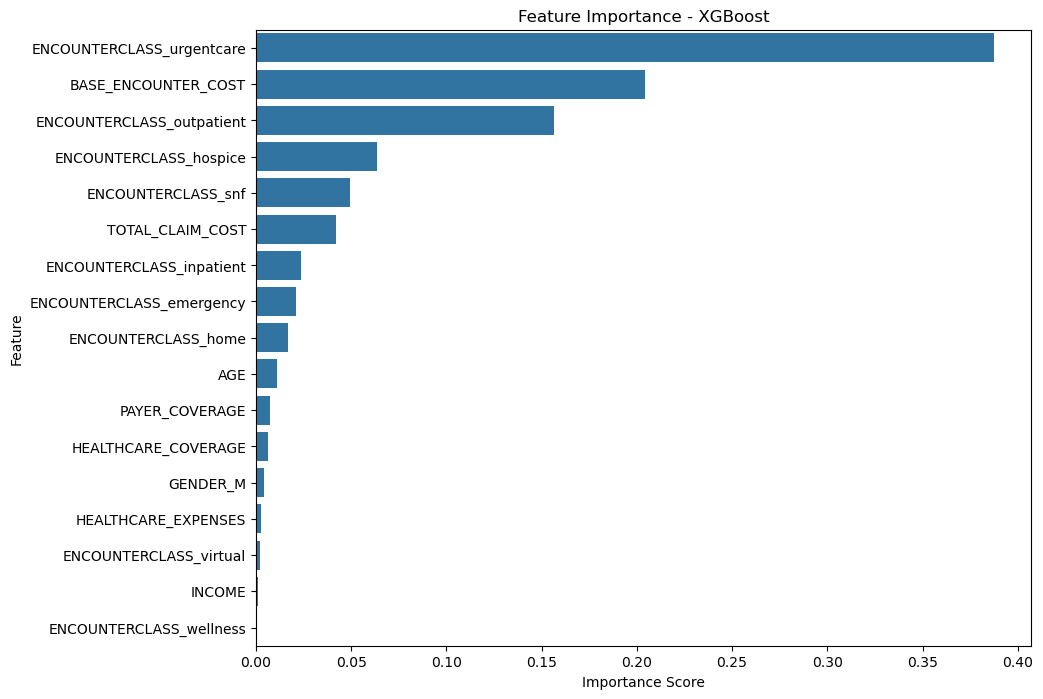

In [25]:
feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# 2. 排序
feature_importance = feature_importance.sort_values(ascending=False)

# 3. 画柱状图
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [107]:
def analyze_description_case(description_input, df_source, df_icd10_reference):
    # 1. 筛选特定病名
    df_case = df_source[df_source['DESCRIPTION'] == description_input].copy()

    if df_case.empty:
        print(f"❌ 没有找到病名为 '{description_input}' 的记录。")
        return

    # 2. 基本统计
    total = len(df_case)
    ed_rate = df_case['ED_label'].mean() * 100
    male_rate = (df_case['GENDER'] == 'M').mean() * 100
    female_rate = (df_case['GENDER'] == 'F').mean() * 100

    print("=== Prediction Summary ===")
    print(f"Description: {description_input}")
    print(f"Total patients: {total:,}")
    print(f"Predicted ED visits: {ed_rate:.2f}%")
    print(f"Male ratio: {male_rate:.2f}%")
    print(f"Female ratio: {female_rate:.2f}%\n")

    # 3. 提取预测为急诊的 ICD10 编码
    icd_codes = df_case[df_case['ED_label'] == 1]['ICD10CM'].dropna().unique()

    # 4. 清洗编码格式
    def clean_icd(code): return str(code).replace('.', '').replace('?', '').upper()
    df_icd10_reference = df_icd10_reference.copy()
    df_icd10_reference['ICD10_clean'] = df_icd10_reference['ICD10'].astype(str).apply(clean_icd)

    df_icd_summary = pd.DataFrame({'ICD10': icd_codes})
    df_icd_summary['ICD10_clean'] = df_icd_summary['ICD10'].astype(str).apply(clean_icd)

    # 5. 合并获取描述
    df_icd_summary = df_icd_summary.merge(
        df_icd10_reference[['ICD10_clean', 'ICD10_Description']],
        on='ICD10_clean', how='left'
    )
    df_icd_summary['ICD10_Description'] = df_icd_summary['ICD10_Description'].fillna('missing')

    # 6. 打印输出结果
    print("=== ICD-10 Codes (Predicted ED cases) ===")
    for _, row in df_icd_summary.iterrows():
        print(f"{row['ICD10']}: {row['ICD10_Description']}")

In [111]:
analyze_description_case(
    description_input="Emergency department patient visit (procedure)",
    df_source=df1_merge,
    df_icd10_reference=df3
)

=== Prediction Summary ===
Description: Emergency department patient visit (procedure)
Total patients: 71
Predicted ED visits: 100.00%
Male ratio: 52.11%
Female ratio: 47.89%

=== ICD-10 Codes (Predicted ED cases) ===
J18.9: Pneumonia, unspecified organism


In [29]:
# Display all unique disease descriptions in the 'DESCRIPTION' column of df1_merge
all_diseases = df1_merge['DESCRIPTION'].dropna().unique()

# Sort the diseases alphabetically
all_diseases = sorted(all_diseases)

# Print the total number of unique diseases and a preview
print(f"There are {len(all_diseases)} unique disease descriptions.\n")
print("Preview of some diseases:")
for disease in all_diseases[:60]:  # Preview only the first 60 to avoid excessive output
    print(disease)

There are 60 unique disease descriptions.

Preview of some diseases:
Administration of vaccine to produce active immunity (procedure)
Admission to clinical oncology department (procedure)
Admission to hospice (procedure)
Admission to intensive care unit (procedure)
Admission to surgical department (procedure)
Admission to surgical transplant department (procedure)
Admission to thoracic surgery department (procedure)
Admission to ward (procedure)
Allergic disorder follow-up assessment (regime/therapy)
Allergic disorder initial assessment (regime/therapy)
Asthma follow-up (regime/therapy)
Consultation for treatment (procedure)
Death Certification
Discussion about treatment (procedure)
Domiciliary or rest home patient evaluation and management (procedure)
Drug rehabilitation and detoxification (regime/therapy)
Emergency department patient visit (procedure)
Emergency hospital admission (procedure)
Emergency hospital admission for asthma (procedure)
Emergency room admission (procedure)
Emer

In [113]:
df1_merge[df1_merge['DESCRIPTION'] == "Emergency department patient visit (procedure)"]['ED_label'].value_counts()

ED_label
1    71
Name: count, dtype: int64